# Importing libraries

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tabulate import tabulate
from scipy.stats import norm
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2

# Importing dataset

In [168]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_sample = pd.read_csv('sample_submission.csv')

# Exploratory data analysis

In [169]:
data_train.head()
#data_test.head()
#data_sample.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


The **data_train** dataset contains informations about passengers aboard the Spaceship Titanic. Key features include **PassengerId** (unique identifier), **HomePlanet** (planet of origin), **CryoSleep** (boolean indicating if the passenger was in cryogenic sleep), **Cabin** (cabin details including deck, number, and side), **Destination** (final destination), **Age**, **VIP status** , and various amenities such as **RoomService**, **FoodCourt**, **ShoppingMall**, **Spa**, and **VRDeck**. The **Name** column contains passenger names. The target variable **Transported** indicates whether a passenger was transported by the space-time anomaly. Initial exploration suggests a diverse range of passengers with varying amenities usage and VIP status.

In [170]:
data_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


The summary statistics of numerical features indicate that the dataset contains information on passengers with an average age of approximately 28.83 years old.

The amenities such as **RoomService**, **FoodCourt**, **ShoppingMall**, **Spa**, and **VRDeck** show varying usage levels, with mean values ranging from around 224 to 458.

The standard deviations are relatively high, suggesting a wide dispersion in the usage of these amenities.

Additionally, the minimum values indicate that some passengers did not utilize these amenities at all, while the maximum values reflect the highest recorded usage levels.

The quartile values provide insight into the distribution of these features across the dataset.

In [171]:
data_train.describe(include=['O'])
#id cabin name

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


The summary statistics of categorical features indicate that the dataset includes information on 8693 unique passengers. The HomePlanet feature has three unique values, with 'Earth' being the most common, occurring 4602 times. The CryoSleep feature is binary, with the majority of passengers (5439) not in cryogenic sleep. The Cabin feature has a high cardinality, with 6560 unique values. The most frequent cabin designation is 'G/734/S', occurring 8 times. The Destination feature has three unique values, with 'TRAPPIST-1e' being the most common destination, occurring 5915 times. The VIP feature is binary, with the majority of passengers (8291) not being VIPs. The Name feature has 8473 unique values, with 'Gollux Reedall' being the most frequent name, occurring twice.

In [172]:
data_train.HomePlanet.value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64


This provides insight into the distribution of data regarding individuals' home planets in the DataFrame.

In [173]:
data_train['Transported'] = data_train['Transported'].map({True: 1, False: 0}).astype(int)
data_train[['HomePlanet', 'Transported']].groupby(['HomePlanet'], as_index=False).mean().sort_values(by='Transported', ascending=False)
#moyenne de non-transported par planetes de départ

,HomePlanet,Transported
1,Europa,0.658846
2,Mars,0.523024
0,Earth,0.423946


The analysis shows that passengers from Europa have the highest proportion of being transported (approximately 65.88%), followed by passengers from Mars (approximately 52.30%), and Earth (approximately 42.39%). This suggests a potential correlation between the planet of origin and the likelihood of being transported by the space-time anomaly.

In [174]:
print(data_train.isnull().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [175]:
print(data_train.isnull().sum(axis=1))

0       0
1       0
2       0
3       0
4       0
       ..
8688    0
8689    0
8690    0
8691    0
8692    0
Length: 8693, dtype: int64


In [176]:
# Checking the number of missing values in each column
missing_values = data_train.isnull().sum()

# Calculating the percentage of missing values for each column
missing_percentage = (data_train.isnull().sum() / len(data_train)) * 100

missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})

# Filtering out columns with no missing values
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False)

missing_data

,Missing Values,Percentage (%)
CryoSleep,217,2.496261
ShoppingMall,208,2.392730
VIP,203,2.335212
HomePlanet,201,2.312205
Name,200,2.300702
Cabin,199,2.289198
VRDeck,188,2.162660
FoodCourt,183,2.105142
Spa,183,2.105142
Destination,182,2.093639


The code calculates the number and percentage of missing values for each column in the data_train dataset. The table is sorted in descending order based on the percentage of missing values.

The analysis reveals that the feature 'CryoSleep' has the highest percentage of missing values (approximately 2.50%), followed by 'ShoppingMall' (approximately 2.39%) and 'VIP' (approximately 2.34%). Other features such as 'HomePlanet', 'Name', 'Cabin', and 'VRDeck' also exhibit a non-negligible percentage of missing values.

These results highlight the need for appropriate handling of missing data during data preprocessing to ensure the reliability of subsequent analyses.

Thus, we can replace the missing values by the mean of the colums if the data is numerical, and by the most frequence value if it is not.

In [177]:
data_num = data_train[["PassengerId", "Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]]
data_str = data_train[["HomePlanet", "Cabin", "Destination", "Name"]]
data_bool = data_train[["CryoSleep", "VIP", "Transported"]] #pas de missing values dans transported

"""
#remplacement valeurs manquante de data_num
imputer = SimpleImputer(strategy="mean")
imputer.fit(data_num)
X = imputer.transform(data_num)
data_num_tr = pd.DataFrame(X, columns = data_num.columns)

#remplacement valeurs manquante de data_str
imputer_str = SimpleImputer(strategy="most_frequent")
imputer_str.fit(data_str)
Y = imputer_str.transform(data_str)
data_str_tr = pd.DataFrame(Y, columns=data_str.columns)

#remplacement valeurs manquante de data_str
imputer_bool = SimpleImputer(strategy="most_frequent")
imputer_bool.fit(data_bool)
Z = imputer_bool.transform(data_bool)
data_bool_tr = pd.DataFrame(Z, columns=data_bool.columns)

data_train_tr = pd.concat([data_num_tr, data_str_tr, data_bool_tr], axis=1)

print(data_num_tr)
print(data_str_tr)
print(data_bool_tr)
print(data_train_tr)
"""


def detecter_groupe(data_train):
    data_train['Group'] = data_train['PassengerId'].str[:4]
    occurences_groupes = data_train['Group'].value_counts()
    data_train['DansGroupe'] = data_train['Group'].map(occurences_groupes) > 1


detecter_groupe(data_train)
    
    
def remplir_colonne_par_groupe(data_train, colonne):
    modif_grp = 0
    
    for groupe in data_train['Group'].unique():
        groupe_data = data_train[data_train['Group'] == groupe]
        groupe_non_nul = groupe_data.dropna(subset=[colonne])     
        valeur_frequente = groupe_non_nul[colonne].mode()
        
        if not valeur_frequente.empty:
            valeur_frequente = valeur_frequente.iloc[0]
            groupe_nan = groupe_data[groupe_data[colonne].isnull()]
            data_train.loc[groupe_nan.index, colonne] = valeur_frequente
            modif_grp += len(groupe_nan)
    
    return modif_grp


def remplacer_valeurs(data_train, colonnes):
    modifs = {}
    for colonne in colonnes:
        print(f"Nombre de case vide dans {colonne} avant 1ere modif: {data_train[colonne].isnull().sum()}")
        modifs[colonne] = remplir_colonne_par_groupe(data_train, colonne)
        #print(f"Nombre de cases modifiées dans {colonne} des personnes avec groupe: {modifs[colonne]}")
    
    for colonne in colonnes:
        print(f"Nombre de case vide dans {colonne} avant 2e modif: {data_train[colonne].isnull().sum()}")
        valeur_frequente = data_train[colonne].mode()[0]
        data_train[colonne] = data_train[colonne].fillna(valeur_frequente)
        nb_modifications_apres = data_train[colonne].isnull().sum()
        print(f"Nombre de case vide dans {colonne} apres 2e modif: {data_train[colonne].isnull().sum()}")
        #print(f"Nombre de cases modifiées dans {colonne} des personnes sans groupe: {modifs[colonne] - nb_modifications_apres}")


colonnes_a_modifier = ["HomePlanet", "Cabin", "Destination", "VIP"]
remplacer_valeurs(data_train, colonnes_a_modifier)


def remplacer_valeurs_cryosleep(data_train):
    valeur = data_train["CryoSleep"].mode()[0]
    nb_modifications = data_train["CryoSleep"].isnull().sum()
    data_train["CryoSleep"] = data_train["CryoSleep"].fillna(valeur)
    nb_modifications_apres = data_train["CryoSleep"].isnull().sum()
    print(f"Nombre de cases modifiées dans CryoSleep: {nb_modifications - nb_modifications_apres}")

def remplacer_valeurs_manquantes_age(data_train):
    moyenne_age = data_train['Age'].mean()
    nb_modifications = data_train['Age'].isnull().sum()
    data_train['Age'] = data_train['Age'].fillna(moyenne_age)
    nb_modifications_apres = data_train['Age'].isnull().sum()
    print(f"Nombre de cases modifiées dans Age: {nb_modifications - nb_modifications_apres}")


def remplacer_valeurs_depense(data_train):
    colonnes = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
    moyennes = data_train[colonnes].mean()
    age_condition = data_train['Age'] >= 18

    for colonne in colonnes:
        nb_modifications = data_train[colonne].isnull().sum()
        data_train[colonne] = data_train[colonne].fillna(
            data_train.apply(lambda row: moyennes[colonne] if row['Age'] >= 18 else 0, axis=1)
        )
        nb_modifications_apres = data_train[colonne].isnull().sum()
        print(f"Nombre de cases modifiées dans {colonne}: {nb_modifications - nb_modifications_apres}")


remplacer_valeurs_cryosleep(data_train)
remplacer_valeurs_depense(data_train)
remplacer_valeurs_manquantes_age(data_train)
data_train.drop(columns=['Name'], inplace=True)
data_train.drop(columns=['Group'], inplace=True)
print(data_train.isnull().sum())



Nombre de case vide dans HomePlanet avant 1ere modif: 201


Nombre de case vide dans Cabin avant 1ere modif: 199
Nombre de case vide dans Destination avant 1ere modif: 182
Nombre de case vide dans VIP avant 1ere modif: 203
Nombre de case vide dans HomePlanet avant 2e modif: 111
Nombre de case vide dans HomePlanet apres 2e modif: 0
Nombre de case vide dans Cabin avant 2e modif: 99
Nombre de case vide dans Cabin apres 2e modif: 0
Nombre de case vide dans Destination avant 2e modif: 103
Nombre de case vide dans Destination apres 2e modif: 0
Nombre de case vide dans VIP avant 2e modif: 116
Nombre de case vide dans VIP apres 2e modif: 0
Nombre de cases modifiées dans CryoSleep: 217
Nombre de cases modifiées dans RoomService: 181
Nombre de cases modifiées dans FoodCourt: 183
Nombre de cases modifiées dans ShoppingMall: 208
Nombre de cases modifiées dans Spa: 183


C:\Users\valen\AppData\Local\Temp\ipykernel_22128\1028793887.py:69: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_train[colonne] = data_train[colonne].fillna(valeur_frequente)
C:\Users\valen\AppData\Local\Temp\ipykernel_22128\1028793887.py:82: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_train["CryoSleep"] = data_train["CryoSleep"].fillna(valeur)


Nombre de cases modifiées dans VRDeck: 188
Nombre de cases modifiées dans Age: 179
PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
DansGroupe      0
dtype: int64


C:\Users\valen\AppData\Local\Temp\ipykernel_22128\4073915622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stand["Dépense"] = stand[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1)


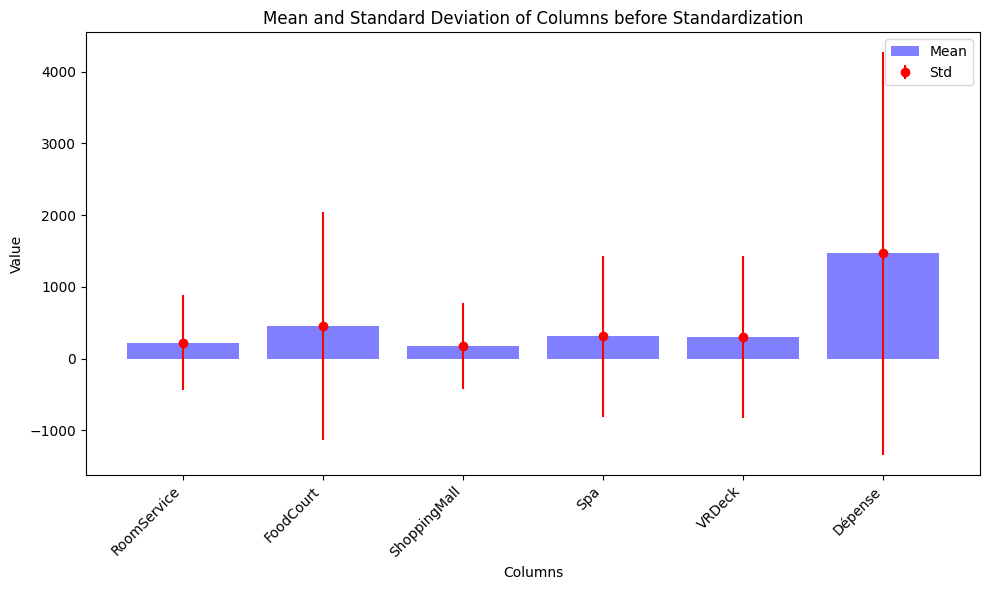

In [178]:
stand = data_train[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]]
stand["Dépense"] = stand[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1)

means = stand.mean()
stds = stand.std()

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(means.index, means, color='blue', alpha=0.5, label='Mean')

ax.errorbar(means.index, means, yerr=stds, fmt='o', color='red', label='Std')

ax.set_title('Mean and Standard Deviation of Columns before Standardization')
ax.set_xlabel('Columns')
ax.set_ylabel('Value')
ax.legend()

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


Il faut grave standardiser la c'est urgent

In [179]:
from sklearn.preprocessing import StandardScaler

"""
scaler = StandardScaler()
data_num_stand = scaler.fit_transform(stand)
data_num_stand = pd.DataFrame(data_num_stand, columns=stand.columns)

print(data_num_stand)

a = data_num_tr[["PassengerId", "Age"]]
data_num_tr = pd.concat([a, data_num_stand], axis=1)

print(data_num_tr)

data_train_tr = pd.concat([data_num_tr, data_str_tr, data_bool_tr], axis=1)
"""
scaler = StandardScaler()

data_num_stand = scaler.fit_transform(data_train[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]])
data_num_stand = pd.DataFrame(data_num_stand, columns=["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"])

print(data_num_stand)
colones = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
for colone in colones:
    data_train[colone] = data_num_stand[colone] 
    
print(data_train)


      RoomService  FoodCourt  ShoppingMall       Spa    VRDeck
0       -0.338767  -0.286247     -0.289562 -0.275507 -0.267644
1       -0.173589  -0.280603     -0.247720  0.212587 -0.228823
2       -0.273605   1.956353     -0.289562  5.694529 -0.224411
3       -0.338767   0.518355      0.331372  2.684173 -0.097359
4        0.120398  -0.242349     -0.036837  0.226812 -0.265880
...           ...        ...           ...       ...       ...
8688    -0.338767   3.990122     -0.289562  1.185218 -0.202354
8689    -0.338767  -0.286247     -0.289562 -0.275507 -0.267644
8690    -0.338767  -0.286247      2.843559 -0.274618 -0.267644
8691    -0.338767   0.371607     -0.289562  0.038331  2.586611
8692    -0.147827   2.653717     -0.289562 -0.275507 -0.257057

[8693 rows x 5 columns]
     PassengerId HomePlanet  CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa      False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth      False     F/0/S    TRAPPIS

Data Splitting:

The code initially splits the dataset data_train into three separate datasets based on the type of features:
data_num: Contains numerical features such as PassengerId, Age, and various amenities.
data_str: Contains categorical string features like HomePlanet, Cabin, and Name.
data_bool: Contains boolean features including CryoSleep, VIP, and Transported.
Missing Value Imputation:

Missing values in each subset are imputed separately using different strategies:
For data_num, missing values are replaced with the mean value of each column using SimpleImputer with the strategy set to "mean".
For data_str, missing values are replaced with the most frequent value (mode) of each column using SimpleImputer with the strategy set to "most_frequent".
Similarly, for data_bool, missing values are replaced with the most frequent value.
Concatenation:

After imputation, the transformed subsets are concatenated back together along the columns to form the new DataFrame data_train_tr.
Result:

The resulting DataFrame data_train_tr contains all the original columns with missing values replaced. Now, the dataset is ready for further analysis or modeling without any missing values.

In [180]:
print("data_num_tr:\n")
print(data_num_tr.isnull().sum())
print("--------")
print("data_str_tr:\n")
print(data_str_tr.isnull().sum())
print("--------")
print("data_bool_tr:\n")
print(data_bool_tr.isnull().sum())
print("--------")
print("data_train_tr:\n")
print(data_train_tr.isna().sum())

data_num_tr:



NameError: name 'data_num_tr' is not defined

After imputation, the code checks for missing values in each subset: For data_num, there are no missing values in any of the columns.
Similarly, for data_str and data_bool, all columns have been successfully imputed, and there are no missing values.
Overall Dataset Check:

The code then checks for missing values in the concatenated dataset data_train_tr. As expected, there are no missing values in any column of the combined dataset.

These results confirm that missing values have been successfully handled through imputation, and the dataset is now complete and ready for further analysis or modeling.

In [ ]:
print('Transported' in data_train_tr.columns)

True



The printed statement confirms that the column "Transported" is indeed present in the DataFrame data_train_tr. The boolean value True indicates that the column exists within the DataFrame's columns. This verification is important to ensure that the transformation and concatenation processes did not inadvertently remove or alter the desired columns.

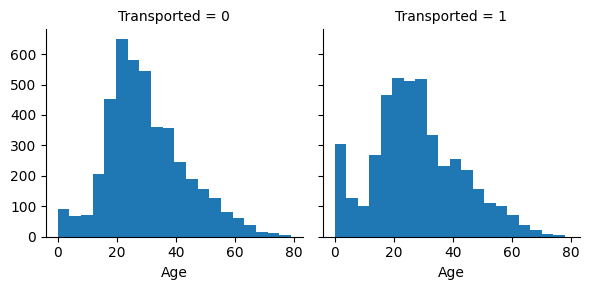

In [ ]:
g = sns.FacetGrid(data_train, col='Transported')
g.map(plt.hist, 'Age', bins=20)

*   **Age Distribution and Transported Status :** The concentration of non-transported individuals within the 18 to 40 age range suggests that this demographic may have been more actively involved in the event leading to transportation. Conversely, the broader age distribution among transported individuals, including a peak of newborns, indicates a wider demographic affected by the transportation event ;

*   **Impact of Age on Transported Status :** The presence of newborns among transported individuals may suggest a vulnerability to the transportation phenomenon across all age groups. It could imply that factors other than age alone influence an individual's likelihood of being transported ;

*   **Potential Factors Influencing Transportation :** Further analysis could explore potential factors contributing to transportation, such as occupation, socioeconomic status, or health conditions. Understanding these factors may provide insights into why certain age groups are more affected than others ;

*   **Effectiveness of Rescue Efforts :** The age distribution of transported individuals may also reflect the success of rescue efforts. For example, the presence of newborns could indicate prioritization in rescue operations or differential susceptibility to the transportation phenomenon ;

*   **Long-Term Implications :** The implications of transportation on different age groups, such as psychological effects, societal adaptation, and resettlement challenges, could be explored. Understanding how different age groups cope with and adapt to transportation could inform future rescue and support efforts.

C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


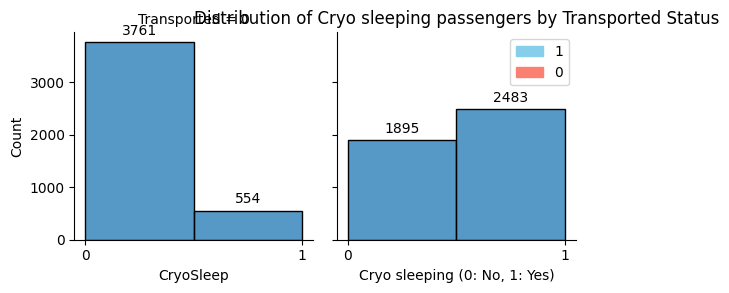

In [ ]:
#data_train_tr['VIP'] = data_train_tr['VIP'].map({True: 1, False: 0}).astype(int)
#g = sns.FacetGrid(data_train_tr, col='Transported')
#g.map(plt.hist, 'VIP', bins=20)


# Mapping boolean values to integers (1 for True, 0 for False)
#data_train_tr['VIP'] = data_train_tr['VIP'].map({True: 1, False: 0}).astype(int)

# Defining color palette for 'Transported' values
transported_colors = {1: 'skyblue', 0: 'salmon'}

# Creating the FacetGrid
g = sns.FacetGrid(data_train, col='Transported')

# Plotting the stacked bar chart for VIP status
g.map(sns.histplot, 'CryoSleep', bins=2, multiple="stack", palette=transported_colors)

# Adding labels and title
plt.xlabel('Cryo sleeping (0: No, 1: Yes)')
plt.ylabel('Count')
plt.title('Distribution of Cryo sleeping passengers by Transported Status')

# Adding legend
handles = [plt.Rectangle((0,0),1,1, color=transported_colors[label]) for label in transported_colors]
plt.legend(handles, transported_colors.keys(), loc='upper right')

# Setting x-axis ticks to be binary values
plt.xticks(ticks=[0, 1])

# Adding numeric values on top of each bar
for ax in g.axes.flat:
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom')

# Showing the plot
plt.show()

#Améliorer pour avoir la distinction de couleurs

C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


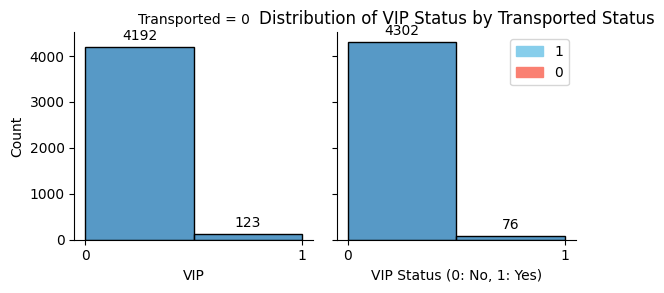

In [ ]:
#data_train_tr['VIP'] = data_train_tr['VIP'].map({True: 1, False: 0}).astype(int)
#g = sns.FacetGrid(data_train_tr, col='Transported')
#g.map(plt.hist, 'VIP', bins=20)


# Mapping boolean values to integers (1 for True, 0 for False)
#data_train_tr['VIP'] = data_train_tr['VIP'].map({True: 1, False: 0}).astype(int)

# Defining color palette for 'Transported' values
transported_colors = {1: 'skyblue', 0: 'salmon'}

# Creating the FacetGrid
g = sns.FacetGrid(data_train, col='Transported')

# Plotting the stacked bar chart for VIP status
g.map(sns.histplot, 'VIP', bins=2, multiple="stack", palette=transported_colors)

# Adding labels and title
plt.xlabel('VIP Status (0: No, 1: Yes)')
plt.ylabel('Count')
plt.title('Distribution of VIP Status by Transported Status')

# Adding legend
handles = [plt.Rectangle((0,0),1,1, color=transported_colors[label]) for label in transported_colors]
plt.legend(handles, transported_colors.keys(), loc='upper right')

# Setting x-axis ticks to be binary values
plt.xticks(ticks=[0, 1])

# Adding numeric values on top of each bar
for ax in g.axes.flat:
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom')

# Showing the plot
plt.show()

#Améliorer pour avoir la distinction de couleurs

These graphs represent the distribution of VIP status among transported and non-transported passengers. Here are the interpretations:

For non-transported passengers (Transported = 0):

There are 4192 passengers who are not VIP and 123 VIP passengers.
The histogram shows that the majority of non-transported passengers are not VIP, with a significantly higher number of regular passengers compared to VIP ones.
The bar corresponding to VIP passengers is much smaller in comparison, suggesting that there are relatively fewer VIP passengers among those who are not transported.

For transported passengers (Transported = 1) :
There are 4302 passengers who are not VIP and 76 VIP passengers.
Similar to non-transported passengers, the majority of transported passengers are not VIP, with a much larger bar for regular passengers.
However, the difference between the number of regular passengers and VIP passengers is even more pronounced among transported passengers, suggesting that VIP passengers are less likely to be transported compared to regular passengers.
In summary, these graphs indicate a trend where regular passengers are less likely to be transported, suggesting that VIP status may be a determining factor in passenger selection for transportation.







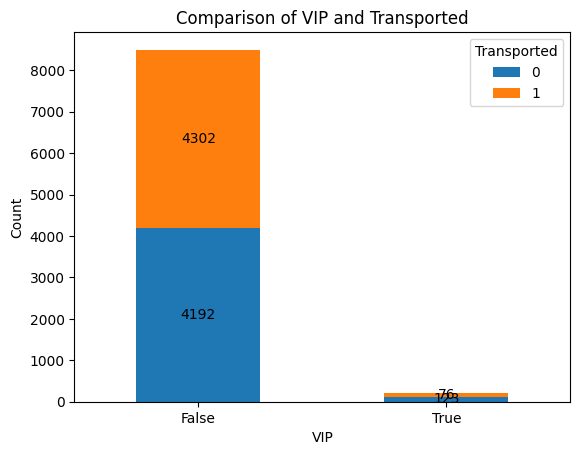

In [ ]:
comparison_df = data_train.groupby(['VIP', 'Transported']).size().unstack()

# Créer le graphique à barres empilées
ax = comparison_df.plot(kind='bar', stacked=True)

# Ajouter les valeurs numériques au-dessus de chaque barre
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center')

plt.xlabel('VIP')
plt.ylabel('Count')
plt.title('Comparison of VIP and Transported')
plt.xticks(rotation=0)
plt.show()

# à supprimer ?

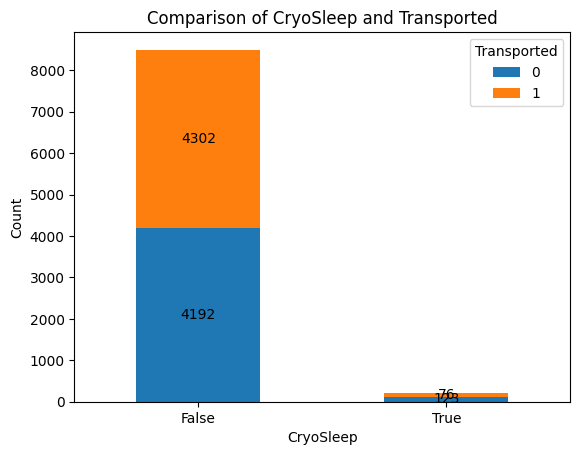

In [ ]:
# Créer le graphique à barres empilées
ax = comparison_df.plot(kind='bar', stacked=True)

# Ajouter les valeurs numériques au-dessus de chaque barre
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center')

# Autres paramètres du graphique
plt.xlabel('CryoSleep')
plt.ylabel('Count')
plt.title('Comparison of CryoSleep and Transported')
plt.xticks(rotation=0)
plt.show()


# à supprimer ?

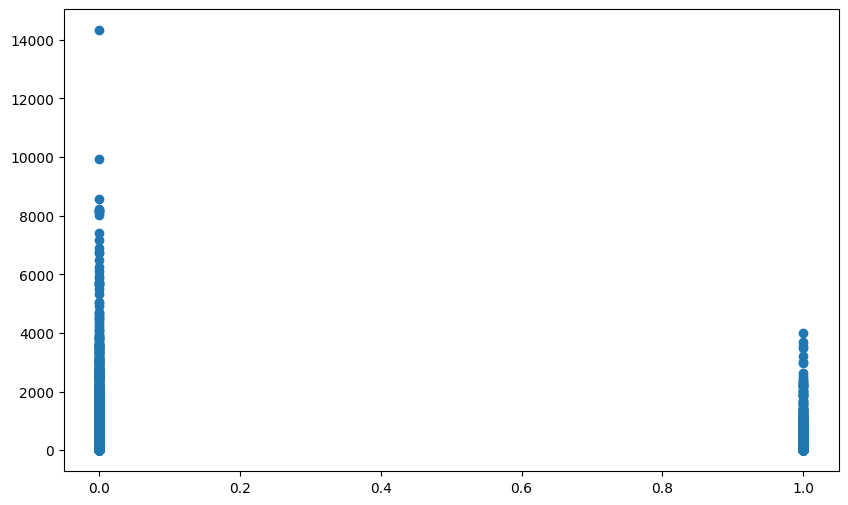

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data_train['Transported'], data_train['RoomService'])
#plt.title('Heart Disease by Age')
plt.show()

In [ ]:
#plt.figure(figsize=(10, 6))
#plt.scatter(data_train['Transported'], data_train['PassengerId'].astype(str).str.slice(0, 4))
#plt.show()


In [ ]:
"""
# Créer une nouvelle colonne pour stocker les noms des colonnes avec des valeurs manquantes
missing_data['Columns with Missing Values'] = data_train.apply(lambda row: row.index[row.isnull()].tolist(), axis=1)

# Filtrer les lignes avec des valeurs manquantes
missing_data = missing_data[missing_data['Missing Values'] > 1]

# Afficher le DataFrame résultant
print(missing_data)
"""


"\n# Créer une nouvelle colonne pour stocker les noms des colonnes avec des valeurs manquantes\nmissing_data['Columns with Missing Values'] = data_train.apply(lambda row: row.index[row.isnull()].tolist(), axis=1)\n\n# Filtrer les lignes avec des valeurs manquantes\nmissing_data = missing_data[missing_data['Missing Values'] > 1]\n\n# Afficher le DataFrame résultant\nprint(missing_data)\n"

On observe que le maximum de valeurs manquantes par ligne vaut 2. Nous n'avons donc pas besoin de supprimer de ligne du dataset.

# Data preprocessing

We have to preprocess the data before feeding it to the machine learning models. We will replace the categorical features with numerical ones.

In [183]:
homeplanet_dummies = pd.get_dummies(data_train["HomePlanet"], prefix = "HomePlanet")

destination_dummies = pd.get_dummies(data_train["Destination"], prefix = "Destination")

data_train = pd.concat([data_train, homeplanet_dummies, destination_dummies], axis = 1)


data_train.drop(columns=['Destination'], inplace=True)
data_train.drop(columns=['HomePlanet'], inplace=True)
print(data_train)

     PassengerId  CryoSleep     Cabin   Age    VIP  RoomService  FoodCourt  \
0        0001_01      False     B/0/P  39.0  False    -0.338767  -0.286247   
1        0002_01      False     F/0/S  24.0  False    -0.173589  -0.280603   
2        0003_01      False     A/0/S  58.0   True    -0.273605   1.956353   
3        0003_02      False     A/0/S  33.0  False    -0.338767   0.518355   
4        0004_01      False     F/1/S  16.0  False     0.120398  -0.242349   
...          ...        ...       ...   ...    ...          ...        ...   
8688     9276_01      False    A/98/P  41.0   True    -0.338767   3.990122   
8689     9278_01       True  G/1499/S  18.0  False    -0.338767  -0.286247   
8690     9279_01      False  G/1500/S  26.0  False    -0.338767  -0.286247   
8691     9280_01      False   E/608/S  32.0  False    -0.338767   0.371607   
8692     9280_02      False   E/608/S  44.0  False    -0.147827   2.653717   

      ShoppingMall       Spa    VRDeck  Transported  DansGroupe

categorical variables such as "HomePlanet" and "Destination" are transformed into binary variables. Each unique category in these columns becomes a new column in the DataFrame, with binary values ​​indicating the presence or absence of the category for each observation. For example, if the planets include "Earth", "Mars" and "Europa", three new columns will be created, one for each planet, and each observation will have a 1 in the column corresponding to its planet of origin and a 0 in others.
and we delete the HomePlanet" and "Destination" columns because they are no longer useful


In [185]:
data_train[['Deck', 'Num', 'Side']] = data_train['Cabin'].str.extract(r'([A-G])/(\d+)/([PS])')

deck_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
data_train['Deck'] = data_train['Deck'].map(deck_mapping)

data_train['Side'] = data_train['Side'].map({'P': 0, 'S': 1})#

data_train['Deck'] = pd.to_numeric(data_train['Deck'])
data_train['Num'] = pd.to_numeric(data_train['Num'])

print(data_train.head())

  PassengerId  CryoSleep  Cabin   Age    VIP  RoomService  FoodCourt  \
0     0001_01      False  B/0/P  39.0  False    -0.338767  -0.286247   
1     0002_01      False  F/0/S  24.0  False    -0.173589  -0.280603   
2     0003_01      False  A/0/S  58.0   True    -0.273605   1.956353   
3     0003_02      False  A/0/S  33.0  False    -0.338767   0.518355   
4     0004_01      False  F/1/S  16.0  False     0.120398  -0.242349   

   ShoppingMall       Spa    VRDeck  ...  DansGroupe  HomePlanet_Earth  \
0     -0.289562 -0.275507 -0.267644  ...       False             False   
1     -0.247720  0.212587 -0.228823  ...       False              True   
2     -0.289562  5.694529 -0.224411  ...        True             False   
3      0.331372  2.684173 -0.097359  ...        True             False   
4     -0.036837  0.226812 -0.265880  ...       False              True   

   HomePlanet_Europa  HomePlanet_Mars  Destination_55 Cancri e  \
0               True            False                   

We proceed to divide the "Cabin" column into three distinct columns: "deck", "num", and "side". Next, we transform the letters in the "deck" column into numbers based on their respective position in the alphabet. The 'P' and 'S' values ​​in the "side" column are converted to 0 and 1. The "deck" and "num" columns are also converted to numeric type. Finally, we display the first rows of the transformed data for inspection.


In [ ]:
data_train_tr[['Deck', 'Num', 'Side']] = data_train_tr['Cabin'].str.extract(r'([A-G])/(\d+)/([PS])')

deck_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
data_train_tr['Deck'] = data_train_tr['Deck'].map(deck_mapping)

data_train_tr['Side'] = data_train_tr['Side'].map({'P': 0, 'S': 1})#

data_train_tr['Deck'] = pd.to_numeric(data_train_tr['Deck'])
data_train_tr['Num'] = pd.to_numeric(data_train_tr['Num'])

print(data_train_tr.head())

  PassengerId HomePlanet  CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa      False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth      False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa      False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa      False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth      False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall  ...  DansGroupe  HomePlanet_Earth  \
0    -0.338767  -0.286247     -0.289562  ...       False             False   
1    -0.173589  -0.280603     -0.247720  ...       False              True   
2    -0.273605   1.956353     -0.289562  ...        True             False   
3    -0.338767   0.518355      0.331372  ...        True             False   
4     0.120398  -0.242349     -0.036837  ...       False              True   

   HomePlanet_Europa  HomePlanet_Mars  Destination_55 Cancri e  \
0               True            

In [186]:
# Supposons que df soit votre DataFrame contenant la variable "Cabin"
# Vous pouvez remplacer 'df' par le nom de votre DataFrame

# Appliquer One-Hot Encoding à la variable 'Cabin'

#deck_dummies = pd.get_dummies(data_train_tr['Num'], prefix='Num')
side_dummies = pd.get_dummies(data_train['Side'], prefix='Side')
deck_dummies = pd.get_dummies(data_train['Deck'], prefix='Deck')

# Concaténer les nouvelles variables binaires à votre DataFrame original
data_train = pd.concat([data_train, deck_dummies, side_dummies], axis=1)

# Supprimer la colonne 'Cabin' originale si nécessaire
data_train.drop('Deck', axis=1, inplace=True)
data_train.drop('Num', axis=1, inplace=True)
data_train.drop('Side', axis=1, inplace=True)
data_train.drop('Cabin', axis=1, inplace=True)

print(data_train.head())
data_train.to_csv('data_train_tr.csv', index=False)
data_train = pd.read_csv('data_train_tr.csv')

  PassengerId  CryoSleep   Age    VIP  RoomService  FoodCourt  ShoppingMall  \
0     0001_01      False  39.0  False    -0.338767  -0.286247     -0.289562   
1     0002_01      False  24.0  False    -0.173589  -0.280603     -0.247720   
2     0003_01      False  58.0   True    -0.273605   1.956353     -0.289562   
3     0003_02      False  33.0  False    -0.338767   0.518355      0.331372   
4     0004_01      False  16.0  False     0.120398  -0.242349     -0.036837   

        Spa    VRDeck  Transported  ...  Destination_TRAPPIST-1e  Deck_1.0  \
0 -0.275507 -0.267644            0  ...                     True     False   
1  0.212587 -0.228823            1  ...                     True     False   
2  5.694529 -0.224411            0  ...                     True      True   
3  2.684173 -0.097359            0  ...                     True      True   
4  0.226812 -0.265880            1  ...                     True     False   

   Deck_2.0  Deck_3.0  Deck_4.0  Deck_5.0  Deck_6.0  Dec

In [187]:
print(data_train.isnull().sum())

PassengerId                  0
CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Transported                  0
DansGroupe                   0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
Deck_1.0                     0
Deck_2.0                     0
Deck_3.0                     0
Deck_4.0                     0
Deck_5.0                     0
Deck_6.0                     0
Deck_7.0                     0
Side_0.0                     0
Side_1.0                     0
dtype: int64


we add the “Deck”, “Num” and “Side” columns which now only contain numeric data to data_train_tr

and we remove the cabin column because it is no longer useful

In [ ]:
#data_train_tr.drop(columns=['Name'], inplace=True)

Deleting the 'name' column can be justified for several reasons. First, it is redundant because the information it contains is already present in other columns in our dataset. In the context of our analysis, where identifying passengers by name is not necessary, the 'name' column becomes irrelevant. We already have other digital characteristics, such as passenger ID, which are more relevant to our analysis.

Second, by removing the 'name' column, we simplify our data analysis model by reducing the number of features to consider. This can make our model easier to interpret and manage, while potentially improving its performance.

However, it is important to note that removing the 'name' column can also result in a reduction in the dimensionality of our dataset. This can have positive implications in terms of calculation time and generalization capacity of our model, reducing the risk of overfitting.


Transforming Boolean Data into Numerical Values


In [ ]:

#data_train_tr['VIP'] = data_train['VIP'].replace({True: 1, False: 0})
#data_train_tr['CryoSleep'] = data_train['CryoSleep'].replace({True: 1, False: 0})
#data_train_tr['Transported'] = data_train['Transported'].replace({True: 1, False: 0})

#print(data_train_tr.head())


In this step, we tackle the digitization of the Boolean data present in the dataset. The data_bool variable includes the columns 'VIP', 'Transported', and 'Cryosleep', which contain Boolean values. We proceed to digitize this data by converting it from the value 'True' to '1' and from the value 'False' to '0'.

In [188]:
types_de_donnees = data_train.dtypes
colonnes_nominales = types_de_donnees[types_de_donnees == 'object']
print("Colonnes avec des données nominales :")
print(colonnes_nominales)

Colonnes avec des données nominales :
PassengerId    object
dtype: object


our data has been converted to a more appropriate form

1. Only numerical data (absence of nominal and Boolean values)
2. No missing values

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Destination_TRAPPIST-1e,Deck_1.0,Deck_2.0,Deck_3.0,Deck_4.0,Deck_5.0,Deck_6.0,Deck_7.0,Side_0.0,Side_1.0
PassengerId,1.000000,-0.006883,-0.009347,0.013608,-0.000234,-0.009209,0.016971,-0.005110,0.015294,0.021491,...,-0.005637,0.006796,-0.006412,0.012162,-0.010296,-0.000515,-0.001824,0.002227,0.005289,-0.004521
CryoSleep,-0.006883,1.000000,-0.070736,-0.078281,-0.244788,-0.206080,-0.206991,-0.198813,-0.193007,0.460132,...,-0.113736,-0.027565,0.126246,0.029142,-0.067295,-0.107865,-0.216445,0.242125,-0.019942,0.020785
Age,-0.009347,-0.070736,1.000000,0.091574,0.069788,0.129056,0.034234,0.122377,0.100844,-0.074249,...,0.004731,0.074403,0.105671,0.128674,0.076052,0.027429,-0.016443,-0.214144,-0.010398,0.009742
VIP,0.013608,-0.078281,0.091574,1.000000,0.056842,0.126145,0.018665,0.060734,0.123274,-0.037261,...,-0.040225,0.134974,0.066079,0.069613,0.069742,-0.013378,-0.059648,-0.099657,0.006940,-0.006764
RoomService,-0.000234,-0.244788,0.069788,0.056842,1.000000,-0.014793,0.053620,0.010503,-0.018463,-0.242200,...,0.062743,-0.024077,-0.057964,-0.018150,0.172224,0.044329,0.084089,-0.146315,0.008894,-0.009249
FoodCourt,-0.009209,-0.206080,0.129056,0.126145,-0.014793,1.000000,-0.013694,0.220961,0.224781,0.045645,...,-0.078081,0.118020,0.155922,0.258923,0.019281,-0.040083,-0.130924,-0.151342,-0.019694,0.019015
ShoppingMall,0.016971,-0.206991,0.034234,0.018665,0.053620,-0.013694,1.000000,0.014220,-0.006905,0.009491,...,0.032904,-0.017946,-0.012124,-0.000718,0.056405,0.031383,0.073747,-0.110134,0.019757,-0.019492
Spa,-0.005110,-0.198813,0.122377,0.060734,0.010503,0.220961,0.014220,1.000000,0.148214,-0.219036,...,-0.033914,0.059058,0.120749,0.165826,0.037278,-0.012519,-0.084342,-0.126074,-0.003574,0.001837
VRDeck,0.015294,-0.193007,0.100844,0.123274,-0.018463,0.224781,-0.006905,0.148214,1.000000,-0.204996,...,-0.051932,0.094897,0.119993,0.207476,-0.003153,-0.019120,-0.093918,-0.128904,0.008128,-0.008716
Transported,0.021491,0.460132,-0.074249,-0.037261,-0.242200,0.045645,0.009491,-0.219036,-0.204996,1.000000,...,-0.096261,0.000068,0.145278,0.109689,-0.034281,-0.096405,-0.090712,0.015911,-0.103418,0.104117


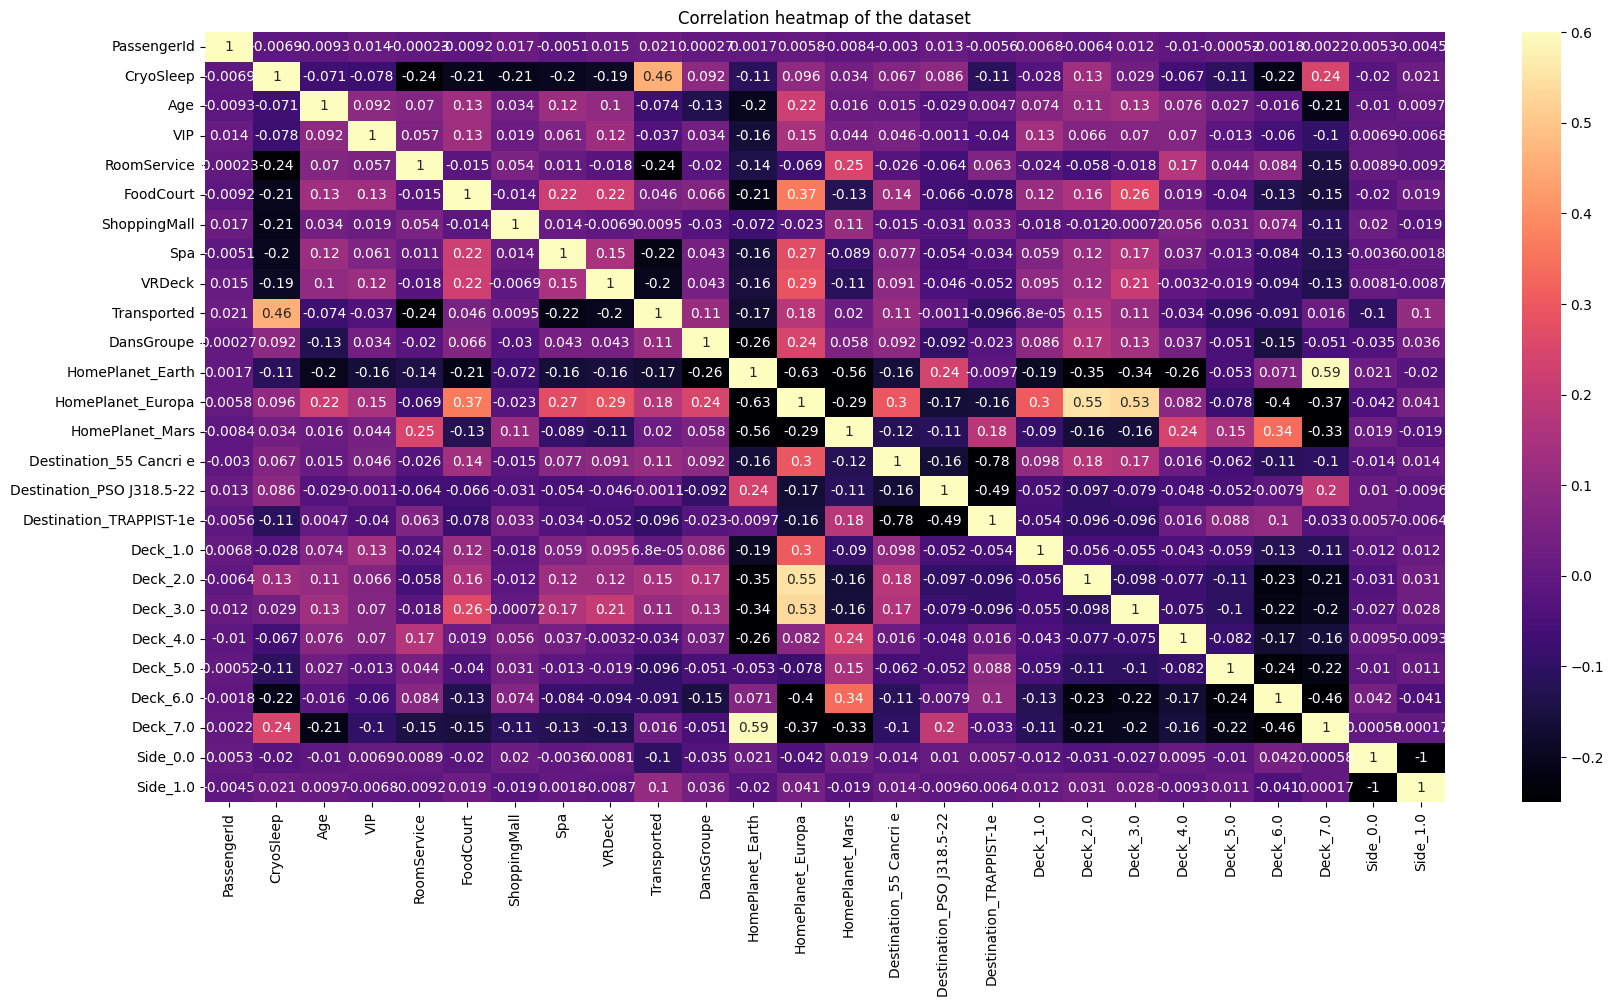

In [ ]:
#data_train_tr['CryoSleep'] = data_train_tr['CryoSleep'].map({True: 1, False: 0}).astype(int)
#correlation_matrix = data_train_tr[['VIP', 'CryoSleep', 'Transported']].corr()
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
#plt.title('Correlation')
#plt.show()


#matrice de coorélation trop chargée
display(data_train.corr())
plt.figure(figsize=(20,10))
sns.heatmap(data_train.corr(), cmap = 'magma', vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation heatmap of the dataset')
plt.show()


Affichage de la liste des colonnes de notre data

In [ ]:
print(data_train_tr.columns)

Index(['PassengerId', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Dépense', 'CryoSleep', 'VIP', 'Transported',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'Deck_1.0', 'Deck_2.0', 'Deck_3.0',
       'Deck_4.0', 'Deck_5.0', 'Deck_6.0', 'Deck_7.0', 'Side_0.0', 'Side_1.0'],
      dtype='object')


Matrice de coorélation

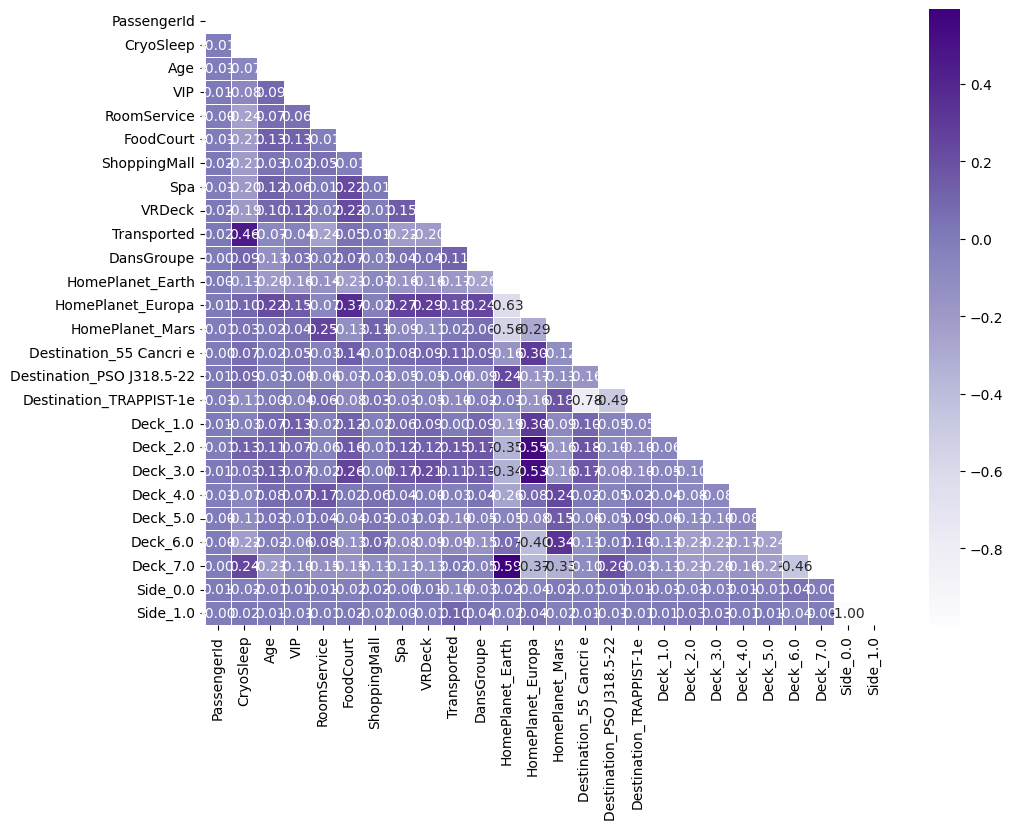

In [ ]:
corr = data_train.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, annot=True, fmt='.2f', linewidth=0.5, cmap='Purples', mask=np.triu(corr))
plt.show()

This correlation matrix presents the linear relationships between different variables in the dataset. Here are some key observations:

*  ** Age :** Shows a slight positive correlation with 'FoodCourt' and 'Spa', suggesting that older individuals might tend to use dining and spa services more frequently ;

*   **RoomService :** Exhibits a moderate negative correlation with 'CryoSleep' and 'VIP', indicating that passengers who do not use room service tend not to be VIP and not in cryogenic hibernation ;

*   **FoodCourt :** Shows a significant positive correlation with 'Spa' and 'ShoppingMall', suggesting that individuals who often use food services may also use spa services and engage in shopping ;

*   **VRDeck :** Displays a moderate correlation with 'Spa' and 'FoodCourt', indicating that passengers who enjoy the virtual reality deck are also inclined to use other recreational facilities ;

*   **CryoSleep :** Notably negatively correlated with most other variables, indicating that passengers in cryogenic hibernation tend to use other onboard services less ;

*   **VIP :** Demonstrates a moderate correlation with 'Age' and 'Spa', suggesting that VIP passengers may be older and tend to use spa services.

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,DansGroupe,...,Destination_TRAPPIST-1e,Deck_1.0,Deck_2.0,Deck_3.0,Deck_4.0,Deck_5.0,Deck_6.0,Deck_7.0,Side_0.0,Side_1.0
CryoSleep,1.000000,-0.070736,-0.078281,-0.244788,-0.206080,-0.206991,-0.198813,-0.193007,0.460132,0.091562,...,-0.113736,-0.027565,0.126246,0.029142,-0.067295,-0.107865,-0.216445,0.242125,-0.019942,0.020785
Age,-0.070736,1.000000,0.091574,0.069788,0.129056,0.034234,0.122377,0.100844,-0.074249,-0.133769,...,0.004731,0.074403,0.105671,0.128674,0.076052,0.027429,-0.016443,-0.214144,-0.010398,0.009742
VIP,-0.078281,0.091574,1.000000,0.056842,0.126145,0.018665,0.060734,0.123274,-0.037261,0.034027,...,-0.040225,0.134974,0.066079,0.069613,0.069742,-0.013378,-0.059648,-0.099657,0.006940,-0.006764
RoomService,-0.244788,0.069788,0.056842,1.000000,-0.014793,0.053620,0.010503,-0.018463,-0.242200,-0.020480,...,0.062743,-0.024077,-0.057964,-0.018150,0.172224,0.044329,0.084089,-0.146315,0.008894,-0.009249
FoodCourt,-0.206080,0.129056,0.126145,-0.014793,1.000000,-0.013694,0.220961,0.224781,0.045645,0.066332,...,-0.078081,0.118020,0.155922,0.258923,0.019281,-0.040083,-0.130924,-0.151342,-0.019694,0.019015
ShoppingMall,-0.206991,0.034234,0.018665,0.053620,-0.013694,1.000000,0.014220,-0.006905,0.009491,-0.029518,...,0.032904,-0.017946,-0.012124,-0.000718,0.056405,0.031383,0.073747,-0.110134,0.019757,-0.019492
Spa,-0.198813,0.122377,0.060734,0.010503,0.220961,0.014220,1.000000,0.148214,-0.219036,0.043014,...,-0.033914,0.059058,0.120749,0.165826,0.037278,-0.012519,-0.084342,-0.126074,-0.003574,0.001837
VRDeck,-0.193007,0.100844,0.123274,-0.018463,0.224781,-0.006905,0.148214,1.000000,-0.204996,0.043208,...,-0.051932,0.094897,0.119993,0.207476,-0.003153,-0.019120,-0.093918,-0.128904,0.008128,-0.008716
Transported,0.460132,-0.074249,-0.037261,-0.242200,0.045645,0.009491,-0.219036,-0.204996,1.000000,0.113792,...,-0.096261,0.000068,0.145278,0.109689,-0.034281,-0.096405,-0.090712,0.015911,-0.103418,0.104117
DansGroupe,0.091562,-0.133769,0.034027,-0.020480,0.066332,-0.029518,0.043014,0.043208,0.113792,1.000000,...,-0.023060,0.086361,0.170049,0.133955,0.037412,-0.051125,-0.150070,-0.051357,-0.034601,0.035635


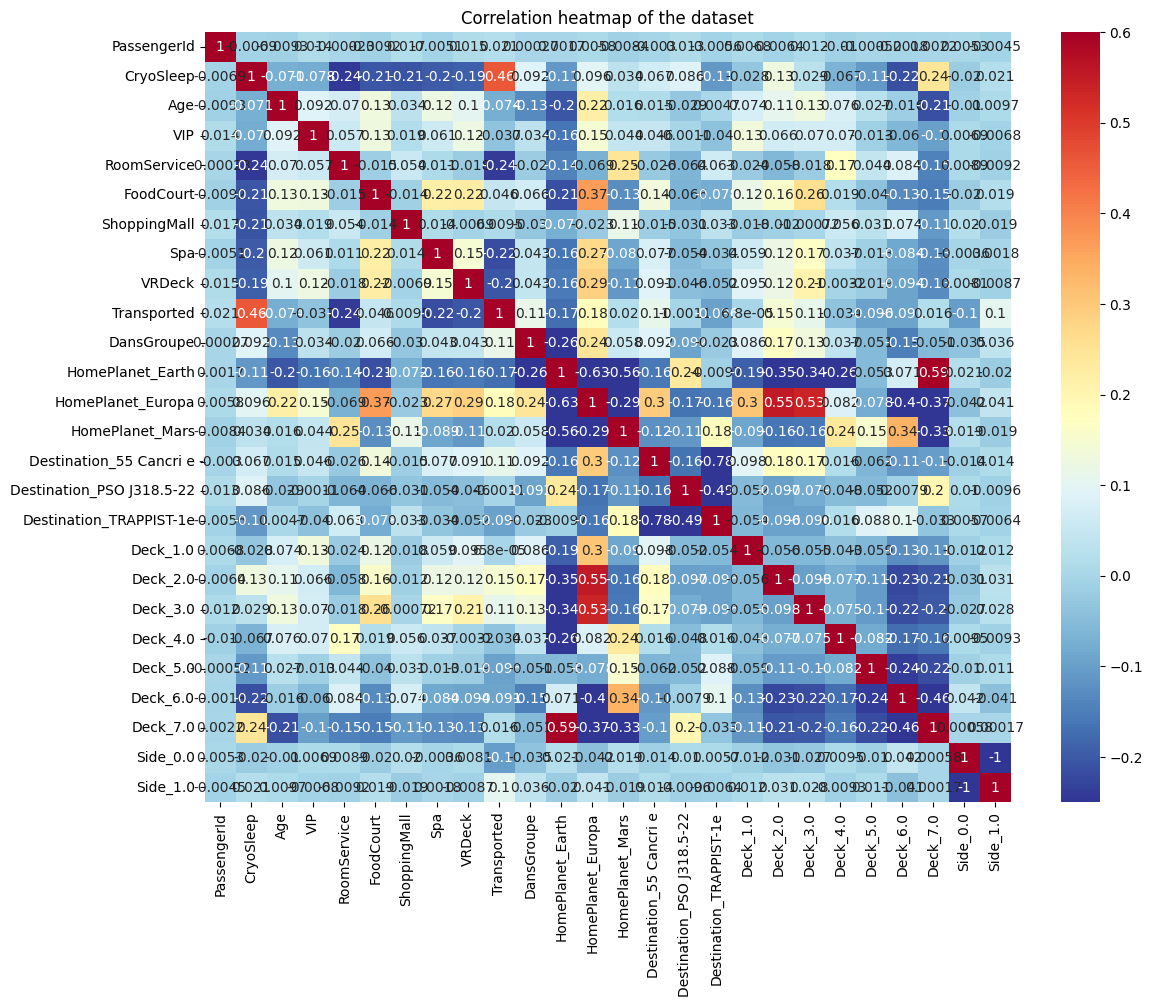

In [ ]:
display(data_train.corr(numeric_only=True))
plt.figure(figsize=(13,10))
sns.heatmap(data_train.corr(), cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation heatmap of the dataset')
plt.show()

In [201]:

"""
data_train_tr['Transported'] = data_train_tr['Transported'].astype(int)
print(data_train_tr['Transported'].dtype)

data_train_tr2 = data_train_tr[['Age','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'CryoSleep', 'Deck_1.0','Deck_2.0','Deck_3.0','Deck_4.0','Deck_5.0','Deck_6.0','Deck_7.0','Deck_1.0','Deck_2.0','Deck_3.0','Deck_4.0','Deck_5.0','Deck_6.0','Deck_7.0','Side_0.0','Side_1.0', 'VIP','Transported']]
data_train_tr3 = data_train_tr[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'CryoSleep', 'Deck_1.0','Deck_2.0','Deck_3.0','Deck_4.0','Deck_5.0','Deck_6.0','Deck_7.0','Deck_1.0','Deck_2.0','Deck_3.0','Deck_4.0','Deck_5.0','Deck_6.0','Deck_7.0','Side_0.0','Side_1.0', 'VIP','Transported']]


data_train_tr.drop(columns=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], inplace=True)
print(data_train_tr.isnull().sum())

print(data_train_tr3.head())
"""

data_train.drop(columns=['PassengerId'], inplace=True)
data_train.drop(columns=['Age'], inplace=True)
def labelEncoder(data_set, data_categorielle):
    label_encoders = {}
    for column in data_categorielle:
        le = LabelEncoder()
        data_set[column] = le.fit_transform(data_train[column].astype(str))
        label_encoders[column] = le

def trouver_colonnes_string(data):
    colonnes_string = []
    for nom_colonne, dtype in data.dtypes.items():
        if dtype != 'float64' and dtype != 'int64':
            colonnes_string.append(nom_colonne)
    return colonnes_string

# Exemple d'utilisation avec votre DataFrame
colonnes_string = trouver_colonnes_string(data_train)
print("Colonnes de type string : ", colonnes_string)
print(data_train.dtypes)



Colonnes de type string :  ['CryoSleep', 'VIP', 'DansGroupe', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Deck_1.0', 'Deck_2.0', 'Deck_3.0', 'Deck_4.0', 'Deck_5.0', 'Deck_6.0', 'Deck_7.0', 'Side_0.0', 'Side_1.0']
CryoSleep                      int32
VIP                            int32
RoomService                  float64
FoodCourt                    float64
ShoppingMall                 float64
Spa                          float64
VRDeck                       float64
Transported                    int64
DansGroupe                     int32
HomePlanet_Earth               int32
HomePlanet_Europa              int32
HomePlanet_Mars                int32
Destination_55 Cancri e        int32
Destination_PSO J318.5-22      int32
Destination_TRAPPIST-1e        int32
Deck_1.0                       int32
Deck_2.0                       int32
Deck_3.0                       int32
Deck_4.0             

Accuracy: 0.7826336975273146
Confusion Matrix:
[[650 211]
 [167 711]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       861
           1       0.77      0.81      0.79       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



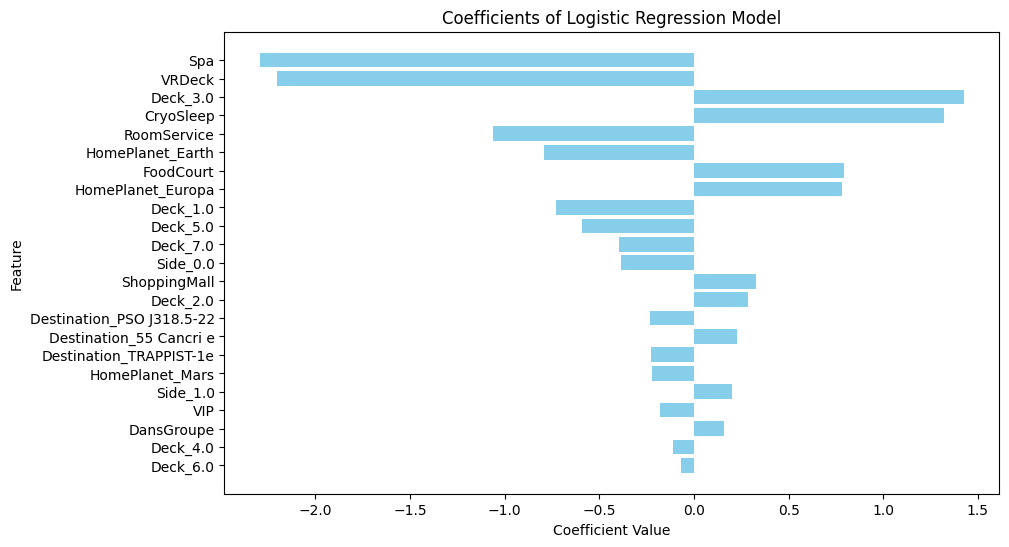

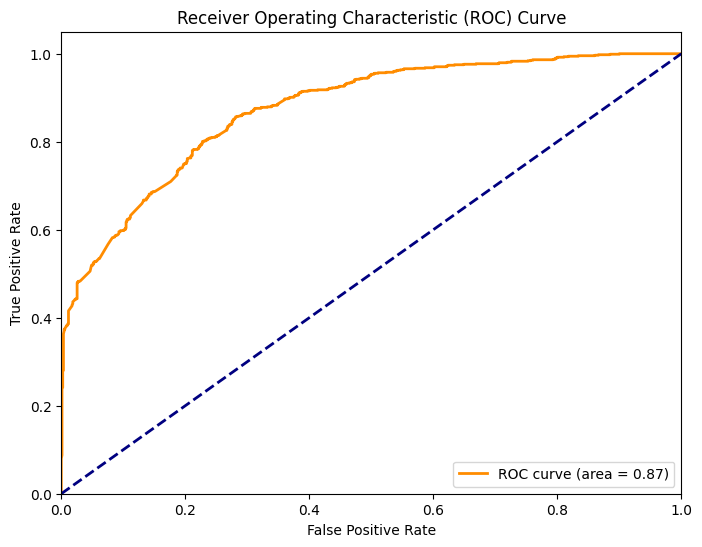

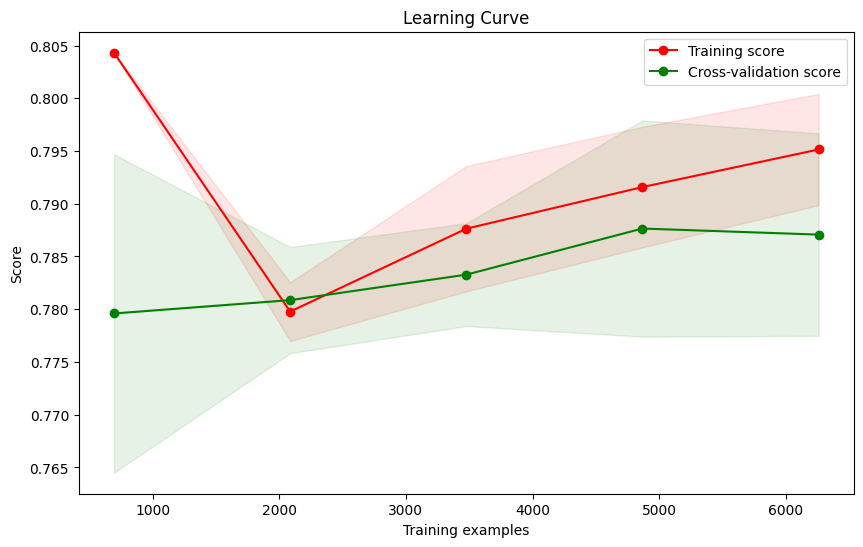

In [202]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

categorielle = ['CryoSleep', 'VIP', 'DansGroupe', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Deck_1.0', 'Deck_2.0', 'Deck_3.0', 'Deck_4.0', 'Deck_5.0', 'Deck_6.0', 'Deck_7.0', 'Side_0.0', 'Side_1.0']
labelEncoder(data_train, categorielle)

X = data_train.drop('Transported', axis=1)
y = data_train['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

y_pred = logistic_regression_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Obtenez les noms des caractéristiques
feature_names = X.columns

# Obtenez les coefficients du modèle
coefficients = logistic_regression_model.coef_[0]

# Triez les coefficients par valeur absolue pour une visualisation plus claire
sorted_indices = np.argsort(np.abs(coefficients))
sorted_feature_names = feature_names[sorted_indices]
sorted_coefficients = coefficients[sorted_indices]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_coefficients)), sorted_coefficients, color='skyblue')
plt.yticks(range(len(sorted_coefficients)), sorted_feature_names)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients of Logistic Regression Model')
plt.show()


# Calculer les probabilités prédites pour les données de test
y_prob = logistic_regression_model.predict_proba(X_test)[:, 1]

# Calculer la courbe ROC et l'aire sous la courbe
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Tracer la courbe d'apprentissage
train_sizes, train_scores, valid_scores = learning_curve(logistic_regression_model, X, y, train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9], cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")



Les deux courbes convergent donc nous ne sommes pas dans un cas de sur-apprentissage. Le score bas d'accuracy peut être alors du à un autre problème. La variable Dépense semble ne pas être corrélée avec la valeur de transported(coefficient négatif), ce qui semble étrange compte tenue des conslusions que nous avons tirées lors de l'analyse des données du data set. Nous allons alors supprimer cette colonne pour la remplacer avec les colonnes d'origine (RoomService, FoodCourt, Spa...).

La création de la colonne "Dépense" n'était pas une bonne idée. On remarque que sans elle le modèle de régression a une meilleur accuracy.
le graphique des coefficients nous montre que les variables de dépense Spa, VRDeck, Roomservice ont un coefficient négatif, ce qui suggère qu'elle ne sont pas ou peu liées à l'état Transported d'une personne, au contraire des variables FoodCourt et ShoppingMall. La création d'une variable où l'on les sommes a estompé cette différence.

Data_train_tr3 Accuracy: 0.7745830937320299
Confusion Matrix:
[[634 227]
 [165 713]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       861
           1       0.76      0.81      0.78       878

    accuracy                           0.77      1739
   macro avg       0.78      0.77      0.77      1739
weighted avg       0.78      0.77      0.77      1739



C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


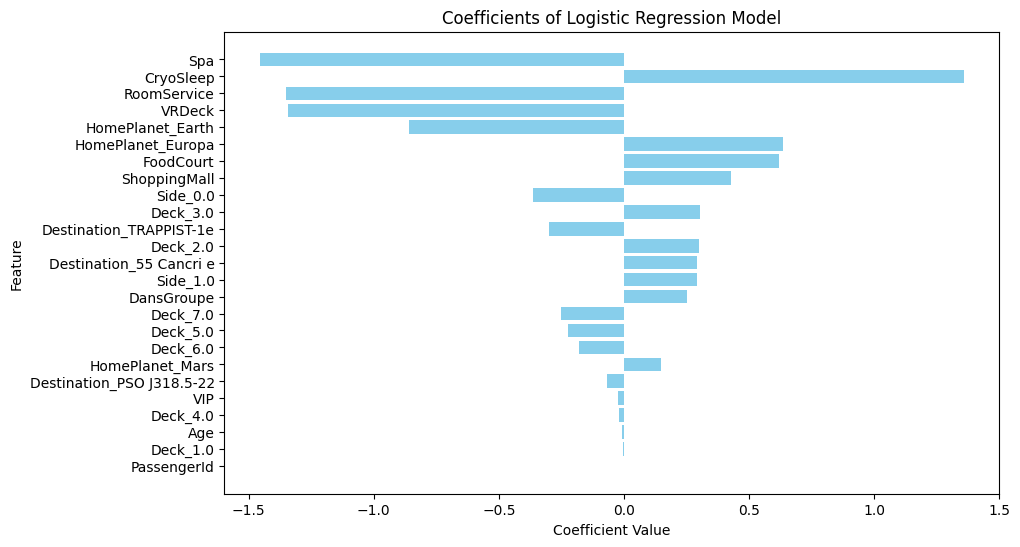

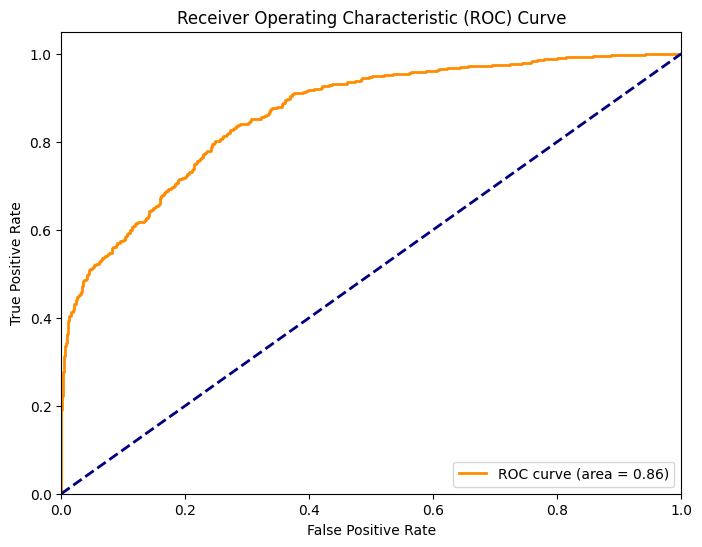

C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

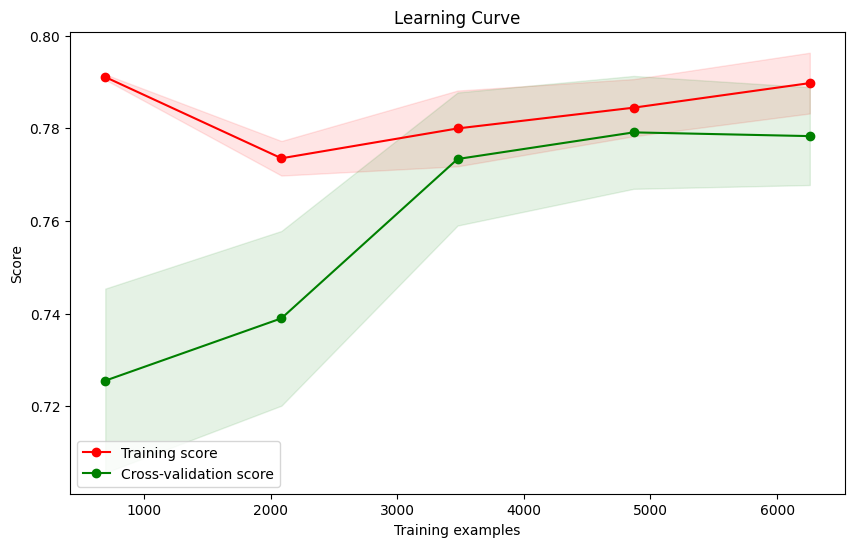

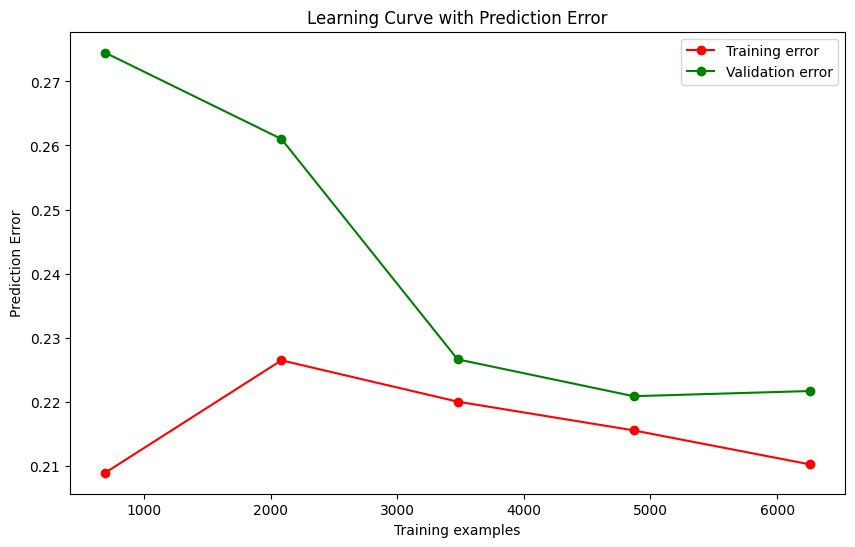

In [204]:

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

data_train_tr3 = pd.read_csv('data_train_tr.csv')

# Encodage des variables catégorielles et booléennes
label_encoders = {}
for column in ['HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'CryoSleep', 'Deck_1.0','Deck_2.0','Deck_3.0','Deck_4.0','Deck_5.0','Deck_6.0','Deck_7.0','Deck_1.0','Deck_2.0','Deck_3.0','Deck_4.0','Deck_5.0','Deck_6.0','Deck_7.0','Side_0.0','Side_1.0', 'VIP']:
    le = LabelEncoder()
    data_train_tr3[column] = le.fit_transform(data_train_tr3[column].astype(str))
    label_encoders[column] = le


X = data_train_tr3.drop('Transported', axis=1)
y = data_train_tr3['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

y_pred = logistic_regression_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Data_train_tr3 Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Obtenez les noms des caractéristiques
feature_names = X.columns

# Obtenez les coefficients du modèle
coefficients = logistic_regression_model.coef_[0]

# Triez les coefficients par valeur absolue pour une visualisation plus claire
sorted_indices = np.argsort(np.abs(coefficients))
sorted_feature_names = feature_names[sorted_indices]
sorted_coefficients = coefficients[sorted_indices]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_coefficients)), sorted_coefficients, color='skyblue')
plt.yticks(range(len(sorted_coefficients)), sorted_feature_names)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients of Logistic Regression Model')
plt.show()

# Calculer les probabilités prédites pour les données de test
y_prob = logistic_regression_model.predict_proba(X_test)[:, 1]

# Calculer la courbe ROC et l'aire sous la courbe
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Tracer la courbe d'apprentissage
train_sizes, train_scores, valid_scores = learning_curve(logistic_regression_model, X, y, train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9], cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, 1 - train_scores_mean, 'o-', color="r", label="Training error")
plt.plot(train_sizes, 1 - valid_scores_mean, 'o-', color="g", label="Validation error")
plt.xlabel("Training examples")
plt.ylabel("Prediction Error")
plt.title("Learning Curve with Prediction Error")
plt.legend(loc="best")
plt.show()



2e Test: en supprimant Cabin et age qui avait l'air d'avoir peu d'importance d'après le graphique des coefficients -> 0.779 légèrement mieux. De plus on peut être sur que le modèle ne fait pas de sur-apprentissage ici: en effet la courbe de validation suit la courbe de formation.

# Support Vector Machine

In [206]:
from sklearn.svm import SVC

categorielle = ['CryoSleep', 'VIP', 'DansGroupe', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Deck_1.0', 'Deck_2.0', 'Deck_3.0', 'Deck_4.0', 'Deck_5.0', 'Deck_6.0', 'Deck_7.0', 'Side_0.0', 'Side_1.0']
labelEncoder(data_train, categorielle)

X = data_train.drop('Transported', axis=1)
y = data_train['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = SVC()
clf.fit(X_train, y_train)

print(f'Accuracy: {clf.score(X_test, y_test)}')

scores = cross_val_score(clf, data_train.drop(['Transported'], axis = 1), data_train['Transported'], cv=5)
print(f'Cross validation scores: {scores}')
print(f'Cross validation mean score: {scores.mean()}')
print(f'Cross validation standard deviation: {scores.std()}')

Accuracy: 0.7855089131684876
Cross validation scores: [0.77515814 0.79183439 0.79930995 0.80609896 0.80034522]
Cross validation mean score: 0.7945493322816242
Cross validation standard deviation: 0.010705505263627338


Accuracy: 0.7855089131684876


C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


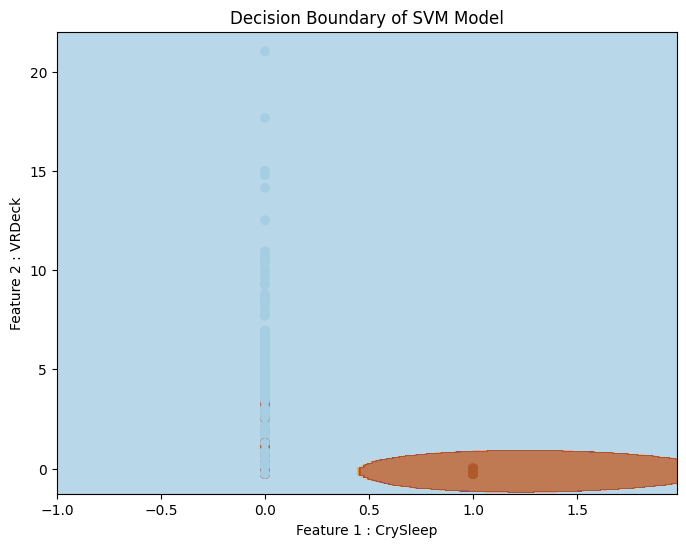

In [207]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


categorielle = ['CryoSleep', 'VIP', 'DansGroupe', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Deck_1.0', 'Deck_2.0', 'Deck_3.0', 'Deck_4.0', 'Deck_5.0', 'Deck_6.0', 'Deck_7.0', 'Side_0.0', 'Side_1.0']
labelEncoder(data_train, categorielle)

X = data_train.drop('Transported', axis=1)
y = data_train['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle SVM
svm_model = SVC(kernel='rbf')  # Autres noyaux possibles : 'rbf' ou 'poly'
svm_model.fit(X_train, y_train)

# Fonction pour tracer les frontières de décision
def plot_decision_boundary(X, y, model, title):
    plt.figure(figsize=(8, 6))
    h = .02  # Pas de la grille
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Feature 1 : CrySleep')
    plt.ylabel('Feature 2 : VRDeck')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.show()

print(f'Accuracy: {svm_model.score(X_test, y_test)}')

# Sélection de deux caractéristiques pour la visualisation : choisir les plus corrélées avec la variable cible
feature1 = 'CryoSleep'  # Corrélation de -0.24 avec Transported
feature2 = 'VRDeck'  # Corrélation de -0.22 avec Transported

# Adapter le modèle SVM avec seulement deux caractéristiques pour la visualisation
svm_model_2d = SVC(kernel='rbf')
svm_model_2d.fit(X_train[[feature1, feature2]], y_train)

# Tracer les frontières de décision
plot_decision_boundary(X_train[[feature1, feature2]], y_train, svm_model_2d, title='Decision Boundary of SVM Model')


# Random Forest

In [209]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

feature1 = 'CryoSleep'  # Corrélation de -0.24 avec Transported
feature2 = 'VRDeck'  # Corrélation de -0.22 avec Transported


categorielle = ['CryoSleep', 'VIP', 'DansGroupe', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Deck_1.0', 'Deck_2.0', 'Deck_3.0', 'Deck_4.0', 'Deck_5.0', 'Deck_6.0', 'Deck_7.0', 'Side_0.0', 'Side_1.0']
labelEncoder(data_train, categorielle)

X = data_train.drop('Transported', axis=1)
y = data_train['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],        # Nombre d'arbres dans la forêt
    'max_depth': [None, 10, 20, 30],        # Profondeur maximale des arbres
    'min_samples_split': [2, 5, 10],        # Nombre minimum d'échantillons requis pour diviser un nœud
    'min_samples_leaf': [1, 2, 4],          # Nombre minimum d'échantillons requis à chaque nœud feuille
}


grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Affichage des meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres trouvés:")
print(grid_search.best_params_)

# Entraînement du modèle final avec les meilleurs hyperparamètres
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Évaluation du modèle sur l'ensemble de test
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Précision sur l'ensemble de test:", accuracy)

"""
# Évaluer le modèle (si nécessaire)
accuracy = rf_model.score(X_test, y_test)
print("Accuracy:", accuracy)

def plot_decision_boundary_rf(X, y, model, title):
    plt.figure(figsize=(8, 6))
    h = .02  # step size in the mesh
    # create a mesh to plot in
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict class using data and model
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.show()

# Entraîner un modèle Random Forest avec seulement deux caractéristiques pour la visualisation
rf_model_2d = RandomForestClassifier(n_estimators=100)
rf_model_2d.fit(X_train[[feature1, feature2]], y_train)

# Tracer les frontières de décision avec le modèle Random Forest
plot_decision_boundary_rf(X_train[[feature1, feature2]], y_train, rf_model_2d, 'Decision Boundary of Random Forest Model')

# Utiliser plot_tree pour visualiser l'arbre sélectionné
plt.figure(figsize=(20,10))
plot_tree(rf_model.estimators_[0],
          feature_names=X_train.columns,
          class_names=['Not Transported', 'Transported'],
          filled=True,
          rounded=True,
          max_depth=4, # Limiter la profondeur pour une visualisation plus lisible; supprimer pour visualiser l'arbre entier
          fontsize=10)
plt.show()
"""

Meilleurs hyperparamètres trouvés:
{'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Précision sur l'ensemble de test: 0.7929844738355377


'\n# Évaluer le modèle (si nécessaire)\naccuracy = rf_model.score(X_test, y_test)\nprint("Accuracy:", accuracy)\n\ndef plot_decision_boundary_rf(X, y, model, title):\n    plt.figure(figsize=(8, 6))\n    h = .02  # step size in the mesh\n    # create a mesh to plot in\n    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1\n    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1\n    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),\n                         np.arange(y_min, y_max, h))\n\n    # Predict class using data and model\n    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])\n\n    # Put the result into a color plot\n    Z = Z.reshape(xx.shape)\n    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)\n\n    # Plot also the training points\n    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Paired)\n    plt.xlabel(\'Feature 1\')\n    plt.ylabel(\'Feature 2\')\n    plt.xlim(xx.min(), xx.max())\n    plt.ylim(yy.min(), yy.max())\n    plt.title(title)\

# Re SVM opti

Meilleurs hyperparamètres trouvés: OrderedDict([('C', 8.853678521158598)])
Précision finale sur l'ensemble de test: 0.7866589994249569


C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


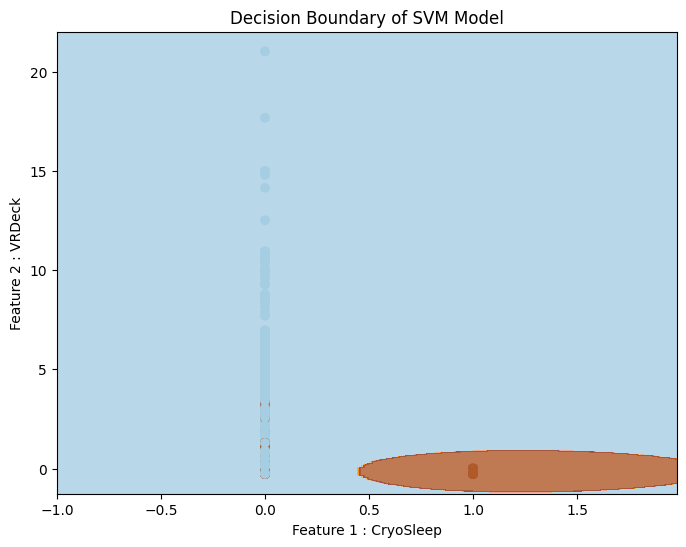

In [210]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skopt import BayesSearchCV
from skopt.space import Real, Categorical

categorielle = ['CryoSleep', 'VIP', 'DansGroupe', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Deck_1.0', 'Deck_2.0', 'Deck_3.0', 'Deck_4.0', 'Deck_5.0', 'Deck_6.0', 'Deck_7.0', 'Side_0.0', 'Side_1.0']
labelEncoder(data_train, categorielle)

X = data_train.drop('Transported', axis=1)
y = data_train['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def optimize_hyperparameters(X_train, y_train, model, param_distributions, cv=5):
    # Recherche bayésienne des hyperparamètres
    bayes_search = BayesSearchCV(estimator=model, search_spaces=param_distributions, cv=cv, n_jobs=-1)
    bayes_search.fit(X_train, y_train)

    # Obtention des meilleurs hyperparamètres trouvés
    best_params = bayes_search.best_params_
    print("Meilleurs hyperparamètres trouvés:", best_params)

    # Entraînement du modèle final avec les meilleurs hyperparamètres
    best_model = model.__class__(**best_params)
    best_model.fit(X_train, y_train)

    return best_model

# Encodage des variables catégorielles et booléennes
#label_encoders = {}
#for column in ['Transported', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'CryoSleep', 'VIP']:
    #le = LabelEncoder()
    #data_train_tr3[column] = le.fit_transform(data_train_tr3[column].astype(str))
    #label_encoders[column] = le
'''
X = data_train_tr3.drop('Transported', axis=1)
y = data_train_tr3['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
'''

# Définition de l'espace de recherche des hyperparamètres
param_distributions = {
    'C': Real(0.01, 10, prior='log-uniform'),  # Valeurs de C à tester en échelle logarithmique
}

# Créer et entraîner le modèle SVM avec recherche bayésienne des hyperparamètres
svm_model = SVC(kernel='rbf')  # Autres noyaux possibles : 'rbf' ou 'poly'
best_model = optimize_hyperparameters(X_train, y_train, svm_model, param_distributions, cv=5)

# Evaluation finale sur l'ensemble de test
final_accuracy = accuracy_score(y_test, best_model.predict(X_test))
print("Précision finale sur l'ensemble de test:", final_accuracy)

# Fonction pour tracer les frontières de décision
def plot_decision_boundary(X, y, model, title):
    plt.figure(figsize=(8, 6))
    h = .02  # Pas de la grille
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Feature 1 : CryoSleep')
    plt.ylabel('Feature 2 : VRDeck')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.show()

# Sélection de deux caractéristiques pour la visualisation : choisir les plus corrélées avec la variable cible
feature1 = 'CryoSleep'  # Corrélation de -0.24 avec Transported
feature2 = 'VRDeck'  # Corrélation de -0.22 avec Transported

# Adapter le modèle SVM avec seulement deux caractéristiques pour la visualisation
svm_model_2d = SVC(**best_model.get_params())  # Utilisation des meilleurs hyperparamètres trouvés
svm_model_2d.fit(X_train[[feature1, feature2]], y_train)

# Tracer les frontières de décision
plot_decision_boundary(X_train[[feature1, feature2]], y_train, svm_model_2d, title='Decision Boundary of SVM Model')


# AdaBoost

In [213]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


categorielle = ['CryoSleep', 'VIP', 'DansGroupe', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Deck_1.0', 'Deck_2.0', 'Deck_3.0', 'Deck_4.0', 'Deck_5.0', 'Deck_6.0', 'Deck_7.0', 'Side_0.0', 'Side_1.0']
labelEncoder(data_train, categorielle)

X = data_train.drop('Transported', axis=1)
y = data_train['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle AdaBoost
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = adaboost_model.predict(X_test)

# Calcul de l'exactitude
accuracy = accuracy_score(y_test, y_pred)
print("Exactitude du modèle AdaBoost:", accuracy)



C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Exactitude du modèle AdaBoost: 0.7855089131684876


In [ ]:

"""

# Encodage des variables catégorielles et booléennes
label_encoders = {}
for column in ['Transported', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'CryoSleep', 'VIP']:
    le = LabelEncoder()
    data_train_tr3[column] = le.fit_transform(data_train_tr3[column].astype(str))
    label_encoders[column] = le

X = data_train_tr3.drop('Transported', axis=1)
y = data_train_tr3['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.astype(int)

#print(y_train.dtype)
#print(np.unique(y_train))

import pandas as pd

# Chargement de vos données
# Assurez-vous de charger vos données correctement ici
# data_train_tr = ...

# Afficher les premières lignes de vos données pour vérification
print("Aperçu des données :")
print(data_train_tr3.head())

# Vérifier les types de données des cibles
print("\nTypes de données des cibles :")
print(data_train_tr3['Transported'].dtype)

# Vérifier les valeurs uniques des cibles
print("\nValeurs uniques des cibles :")
print(data_train_tr3['Transported'].dtype)

# Vérifier s'il y a des valeurs manquantes dans les cibles
print("\nValeurs manquantes dans les cibles :")
print(data_train_tr3['Transported'].isnull().sum())
"""


Aperçu des données :
   RoomService  FoodCourt  ShoppingMall       Spa    VRDeck  HomePlanet_Earth  \
0    -0.340590  -0.287314     -0.290817 -0.276663 -0.269023                 0   
1    -0.175364  -0.281669     -0.248968  0.211505 -0.230194                 1   
2    -0.275409   1.955616     -0.290817  5.694289 -0.225782                 0   
3    -0.340590   0.517406      0.330225  2.683471 -0.098708                 0   
4     0.118709  -0.243409     -0.038048  0.225732 -0.267258                 1   

   HomePlanet_Europa  HomePlanet_Mars  Destination_55 Cancri e  \
0                  1                0                        0   
1                  0                0                        0   
2                  1                0                        0   
3                  1                0                        0   
4                  0                0                        0   

   Destination_PSO J318.5-22  Destination_TRAPPIST-1e  CryoSleep  VIP  \
0                     

C:\Users\valen\AppData\Local\Temp\ipykernel_1572\3016921488.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_tr3[column] = le.fit_transform(data_train_tr3[column].astype(str))
C:\Users\valen\AppData\Local\Temp\ipykernel_1572\3016921488.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_tr3[column] = le.fit_transform(data_train_tr3[column].astype(str))
C:\Users\valen\AppData\Local\Temp\ipykernel_1572\3016921488.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [ ]:
print(data_train_tr3)

      RoomService  FoodCourt  ShoppingMall       Spa    VRDeck  \
0       -0.340590  -0.287314     -0.290817 -0.276663 -0.269023   
1       -0.175364  -0.281669     -0.248968  0.211505 -0.230194   
2       -0.275409   1.955616     -0.290817  5.694289 -0.225782   
3       -0.340590   0.517406      0.330225  2.683471 -0.098708   
4        0.118709  -0.243409     -0.038048  0.225732 -0.267258   
...           ...        ...           ...       ...       ...   
8688    -0.340590   3.989682     -0.290817  1.184286 -0.203720   
8689    -0.340590  -0.287314     -0.290817 -0.276663 -0.269023   
8690    -0.340590  -0.287314      2.842851 -0.275774 -0.269023   
8691    -0.340590   0.370637     -0.290817  0.037223  2.585740   
8692    -0.149594   2.653082     -0.290817 -0.276663 -0.258433   

      HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  \
0                    0                  1                0   
1                    1                  0                0   
2                    

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from skopt import forest_minimize
from skopt.space import Real

data_train_tr3 = data_train_tr[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'CryoSleep', 'VIP','Transported']]

# Encodage des variables catégorielles et booléennes
label_encoders = {}
for column in ['Transported', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'CryoSleep', 'VIP']:
    le = LabelEncoder()
    data_train_tr3[column] = le.fit_transform(data_train_tr3[column].astype(str))
    label_encoders[column] = le

X = data_train_tr3.drop('Transported', axis=1)
y = data_train_tr3['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.astype(int)

# Définition de l'espace de recherche des hyperparamètres
search_spaces = {
    'C': Real(1e-10, 1e10, prior='log-uniform'),
    'gamma': Real(1e-10, 1e10, prior='log-uniform'),
}

# Créer et entraîner le modèle SVM avec recherche bayésienne des hyperparamètres
svm_model = SVC(kernel='rbf')  # Autres noyaux possibles : 'rbf' ou 'poly'
result = forest_minimize(lambda x: SVC(C=x[0], gamma=x[1]).fit(X_train, y_train).score(X_test, y_test),
                         [(1e-10, 1e10), (1e-10, 1e10)], n_calls=10, n_jobs=-1, random_state=42)

# Obtention des meilleurs hyperparamètres trouvés
best_params = {'C': result.x[0], 'gamma': result.x[1]}
print("Meilleurs hyperparamètres trouvés:", best_params)

# Entrainement du modèle final avec les meilleurs hyperparamètres
best_model = SVC(**best_params)
best_model.fit(X_train, y_train)

# Evaluation finale sur l'ensemble de test
final_accuracy = accuracy_score(y_test, best_model.predict(X_test))
print("Précision finale sur l'ensemble de test:", final_accuracy)


C:\Users\valen\AppData\Local\Temp\ipykernel_1572\2629480745.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_tr3[column] = le.fit_transform(data_train_tr3[column].astype(str))
C:\Users\valen\AppData\Local\Temp\ipykernel_1572\2629480745.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_tr3[column] = le.fit_transform(data_train_tr3[column].astype(str))
C:\Users\valen\AppData\Local\Temp\ipykernel_1572\2629480745.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy 

Meilleurs hyperparamètres trouvés: {'C': 7965429868.60233, 'gamma': 1834347898.6616383}
Précision finale sur l'ensemble de test: 0.7377803335250144


C:\Users\valen\AppData\Local\Temp\ipykernel_14752\2866764726.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_tr3[column] = le.fit_transform(data_train_tr3[column].astype(str))
C:\Users\valen\AppData\Local\Temp\ipykernel_14752\2866764726.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_tr3[column] = le.fit_transform(data_train_tr3[column].astype(str))
C:\Users\valen\AppData\Local\Temp\ipykernel_14752\2866764726.py:30: SettingWithCopyWarning: 
A value is trying to be set on a co

Meilleurs hyperparamètres trouvés: {'C': 4455052.394518218, 'gamma': 1.7651524245449533e-06}
Précision finale sur l'ensemble de test: 0.7855089131684876


C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


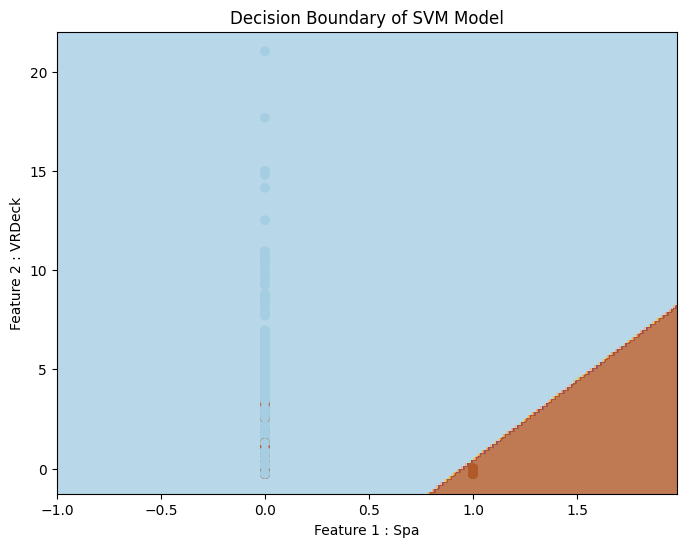

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import loguniform

data_train_tr3 = data_train_tr[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'CryoSleep', 'VIP','Transported']]

def optimize_hyperparameters(X_train, y_train, model, param_distributions, n_iter=10, cv=5, random_state=None):
    # Recherche aléatoire des hyperparamètres
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, n_iter=n_iter, cv=cv, random_state=random_state, n_jobs=-1)
    random_search.fit(X_train, y_train)

    # Obtention des meilleurs hyperparamètres trouvés
    best_params = random_search.best_params_
    print("Meilleurs hyperparamètres trouvés:", best_params)

    # Entraînement du modèle final avec les meilleurs hyperparamètres
    best_model = model.__class__(**best_params)
    best_model.fit(X_train, y_train)

    return best_model

# Encodage des variables catégorielles et booléennes
label_encoders = {}
for column in ['Transported', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'CryoSleep', 'VIP']:
    le = LabelEncoder()
    data_train_tr3[column] = le.fit_transform(data_train_tr3[column].astype(str))
    label_encoders[column] = le

X = data_train_tr3.drop('Transported', axis=1)
y = data_train_tr3['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définition de l'espace de recherche des hyperparamètres
param_distributions = {
    'C': loguniform(1e-10, 1e10),
    'gamma': loguniform(1e-10, 1e10),
}

# Créer et entraîner le modèle SVM avec recherche aléatoire des hyperparamètres
svm_model = SVC(kernel='rbf')  # Autres noyaux possibles : 'rbf' ou 'poly'
best_model = optimize_hyperparameters(X_train, y_train, svm_model, param_distributions, n_iter=10, cv=5, random_state=42)

# Evaluation finale sur l'ensemble de test
final_accuracy = accuracy_score(y_test, best_model.predict(X_test))
print("Précision finale sur l'ensemble de test:", final_accuracy)

# Fonction pour tracer les frontières de décision
def plot_decision_boundary(X, y, model, title):
    plt.figure(figsize=(8, 6))
    h = .02  # Pas de la grille
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Feature 1 : Spa')
    plt.ylabel('Feature 2 : VRDeck')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.show()

# Sélection de deux caractéristiques pour la visualisation : choisir les plus corrélées avec la variable cible
feature1 = 'CryoSleep'  # Corrélation de -0.24 avec Transported
feature2 = 'VRDeck'  # Corrélation de -0.22 avec Transported

# Adapter le modèle SVM avec seulement deux caractéristiques pour la visualisation
svm_model_2d = SVC(**best_model.get_params())  # Utilisation des meilleurs hyperparamètres trouvés
svm_model_2d.fit(X_train[[feature1, feature2]], y_train)

# Tracer les frontières de décision
plot_decision_boundary(X_train[[feature1, feature2]], y_train, svm_model_2d, title='Decision Boundary of SVM Model')


# Feature selection

In [ ]:

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.impute import SimpleImputer

# Sélection des colonnes à utiliser
selected_columns = ['CryoSleep', 'Age', 'VIP', 'FoodCourt', 'Spa', 'VRDeck']

# Imputation des valeurs manquantes
imputer = SimpleImputer(strategy='mean')
data_train_filled = imputer.fit_transform(data_train[selected_columns])

# Sélection des variables les plus pertinentes
X_new = SelectKBest(chi2, k=5).fit_transform(data_train_filled, data_train_tr['Transported'])

# Affichage des informations sur les nouvelles données
print(f'Original shape: {data_train[selected_columns].shape}')
print(f'New shape: {X_new.shape}')
print(X_new[:10])

# Convertir X_new en DataFrame pour pouvoir afficher les 10 premiers éléments facilement
X_new_df = pd.DataFrame(X_new, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5'])

# Afficher les dix premières lignes
print(X_new_df.head(10))
display(X_new_df.info())
display(X_new_df.describe())


#modifier en utilisant data_train_tr au lieu d'imputer les valeurs manquantes

Now that the features have been selected, we are going to train our classifiers on the selected features.

# Training the models

### Data spliting

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new, data_train['Transported'], test_size=0.2, random_state=42)

print(f'X_train shape: {X_train.shape}')
print(f'Y_train shape: {Y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'Y_test shape: {Y_test.shape}')

### Logistic regression

**Training the model**

We will start by training a logistic regression model.

In [ ]:
reg = LogisticRegression()
reg.fit(X_train, Y_train)

print(f'Accuracy: {reg.score(X_test, Y_test)}')

scores = cross_val_score(reg, X_new, data_train['Transported'], cv=5)
print(f'Cross validation scores: {scores}')
print(f'Cross validation mean score: {scores.mean()}')
print(f'Cross validation standard deviation: {scores.std()}')

These results indicate that the logistic regression model achieved an accuracy of approximately 75.04% on the test set. Additionally, during the cross-validation process, the model obtained five different accuracy scores: 75.22%, 71.25%, 74.93%, 75.66%, and 72.27% for each fold, respectively.

The mean cross-validation score, which represents the average accuracy across all folds, is approximately 73.86%. The standard deviation of the cross-validation scores is approximately 1.77%, indicating the variability or consistency of the model's performance across different folds.

Overall, the model demonstrates a reasonably stable performance across different subsets of the data, with an average accuracy around 73.86%, suggesting that it generalizes well to unseen data.

We already have a good accuracy, but we will try to improve it by tuning the hyperparameters.

**Tuning the hyperparameters**

As we made variable selection, wee will try to make a model that uses all the features.